# Water quality (Machine Learning)
Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


Helps interface with the os

In [2]:
import os
print(os.listdir(r"D:\Water quality machine learning"))

['Final dataset 2.csv', 'Final dataset.csv', 'final.csv', 'SS', 'waterquality.csv', 'water_dataX.csv']


Reading the data

In [3]:
data=pd.read_csv(r'D:\Water quality machine learning\Final.csv')

In [4]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,31.6,6.5,33.6,NAN,0.1,11,27,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,7.2,738,2.7,0.518,5000,202,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,6.3,585,2.6,0.155,7000,315,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,6.2,98,1.2,NAN,9500,570,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,6.5,91,1.3,NAN,3050,562,2003.0


Checking the data types

In [5]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                 object
D.O. (mg/l)                          object
PH                                   object
CONDUCTIVITY (mhos/cm)               object
B.O.D. (mg/l)                        object
NITRATENAN N+ NITRITENANN (mg/l)     object
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean       object
year                                float64
dtype: object

In [6]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (mhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (mhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [7]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (mhos/cm)              float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                float64
dtype: object

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\Haran Pragadeesh\Ml projects>SET DISTUTILS_USE_SDK=1 

C:\Users\Haran Pragadeesh\Ml projects>SET MSSdk=1 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_VERSION=15.0" 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_MAJOR=15" 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_YEAR=2017" 

C:\Users\Haran Pragadeesh\Ml projects>set "MSYS2_ARG_CONV_EXCL=/AI;/AL;/OUT;/out" 

C:\Users\Haran Pragadeesh\Ml projects>set "MSYS2_ENV_CONV_EXCL=CL" 

C:\Users\Haran Pragadeesh\Ml projects>set "PY_VCRUNTIME_REDIST=\bin\vcruntime140.dll" 

C:\Users\Haran Pragadeesh\Ml projects>set "CXX=cl.exe" 

C:\Users\Haran Pragadeesh\Ml projects>set "CC=cl.exe" 

C:\Users\Haran Pragadeesh\Ml projects>set "VSINSTALLDIR=" 

C:\Users\Haran Pragadeesh\Ml projects>for /F "usebackq tokens=*" %i in (`vswhere.exe -nologo -products * -version [15.0,16.0) -property installationPath`) do (set "VSINSTALLDIR=%i\" ) 

C:\Users\Haran Pra

The system cannot find the file specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [9]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [10]:
data = data.drop([0,1])

In [11]:
data = data.fillna(data.mean())
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.0,0.200000,4953.0,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.7,0.100000,3243.0,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.8,0.500000,5382.0,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.9,0.400000,3428.0,5500.0,2014.0
6,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000000,5.5,7.4,81.0,1.5,0.100000,2853.0,4049.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.207501,7.9,7.2,738.0,2.7,0.518000,5000.0,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,6.3,585.0,2.6,0.155000,7000.0,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,6.2,98.0,1.2,1.622091,9500.0,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,6.5,91.0,1.3,1.622091,3050.0,562.0,2003.0


In [12]:

columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [13]:
data = data.drop(['Temp','FECAL COLIFORM (MPN/100ml)'],axis = 1)
data

,STATION CODE,LOCATIONS,STATE,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.0,2014.0
6,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.0,2014.0
...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518000,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155000,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,1.622091,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.3,1.622091,562.0,2003.0


In [14]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

data

,station,location,state,do,ph,co,bod,na,tc,year
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,NaN,0.100,NaN,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,NaN,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.3,NaN,562.0,2003.0


In [15]:
#calculation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.O.D
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))



In [16]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,NaN,0.100,NaN,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,8391.0,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518,202.0,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155,315.0,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,NaN,570.0,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.3,NaN,562.0,2003.0,40,100,40,100,80,0


In [17]:
data = data.fillna(data.mean())
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,40,100,40,100,80,0


In [18]:

Si_pH = 7.5
Si_BOD = 0.5
Si_Na = 5
Si_CO = 1500
Si_DO = 7
Si_EC = 275

Reci_Si= 1/Si_pH + 1/Si_BOD + 1/Si_Na + 1/Si_CO + 1/Si_DO + 1/Si_EC 

k= 1/Reci_Si

UW_pH = k/7.5
UW_BOD = k/1
UW_Na = k/20
UW_Co = k/4
UW_DO = k/10
UW_EC = k/75

print(k)
Summation_UW = UW_pH + UW_BOD + UW_Na + UW_Co + UW_DO + UW_EC

OW_pH = UW_pH/Summation_UW
OW_BOD = UW_BOD/Summation_UW
OW_Na = UW_Na/Summation_UW
OW_Co = UW_Co/Summation_UW
OW_DO = UW_DO/Summation_UW
OW_EC= UW_EC/Summation_UW

0.40314558267625844


In [19]:
data['wph']=(data.npH)
data['wdo']=(data.ndo)
data['wbod']=(data.nbod)
data['wec']=(data.nec)
data['wna']=(data.nna)
data['wco']=(data.nco)
data['wqi']=(OW_pH * data.wph+OW_BOD *data.wdo+ OW_Na *data.wbod+OW_Co *data.wec+OW_DO * data.wna+OW_EC *data.wco )
df1  = data

df1

,station,location,state,do,ph,co,bod,na,tc,year,...,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,0,100,100,40,100,0,100,100,0,90.732759
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,100,60,100,100,80,100,60,100,40,80.086207
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,60,100,80,100,100,60,100,40,91.293103
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,100,100,80,80,80,100,100,40,84.181034
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,100,80,100,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,0,100,100,100,100,0,100,60,83.491379
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,0,100,0,100,100,0,100,60,74.870690
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,80,0,0,100,100,80,0,40,81.163793
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,80,0,40,100,100,80,0,40,84.612069


In [20]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
3,1475.0,ZUARI AT PANCHAWADI,GOA
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN


In [21]:
df_dummy = pd.get_dummies(data[dum])
df= pd.concat([data, df_dummy], axis = 1)


In [22]:
dataframe = df1.drop(['station', 'year','do','ph','co','bod','na','tc','ndo','nbod','nec','nna','nco','npH'],axis =1)

columns = ['wdo','wbdo','wec','wna','wco','wph']
labels = ['wqi']
corr_matrix = dataframe.corr()
corr_matrix

,wph,wdo,wbod,wec,wna,wco,wqi
wph,1.000000,-0.005029,-0.110346,-0.161860,-0.066067,-0.084672,0.065784
wdo,-0.005029,1.000000,0.432197,0.336354,-0.025295,0.298060,0.933726
wbod,-0.110346,0.432197,1.000000,0.413296,0.017664,0.370868,0.516130
wec,-0.161860,0.336354,0.413296,1.000000,-0.004849,0.300124,0.611978
wna,-0.066067,-0.025295,0.017664,-0.004849,1.000000,-0.156561,0.073881
wco,-0.084672,0.298060,0.370868,0.300124,-0.156561,1.000000,0.339434
wqi,0.065784,0.933726,0.516130,0.611978,0.073881,0.339434,1.000000


In [23]:
dataframe

,location,state,wph,wdo,wbod,wec,wna,wco,wqi
1,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,40,100,0,100,100,0,90.732759
2,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,100,80,100,60,100,40,80.086207
3,ZUARI AT PANCHAWADI,GOA,80,100,100,60,100,40,91.293103
4,RIVER ZUARI AT BORIM BRIDGE,GOA,80,80,80,100,100,40,84.181034
5,RIVER ZUARI AT MARCAIM JETTY,GOA,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...
1981,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,100,100,100,0,100,60,83.491379
1982,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,0,100,100,0,100,60,74.870690
1983,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,0,100,100,80,0,40,81.163793
1984,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,40,100,100,80,0,40,84.612069


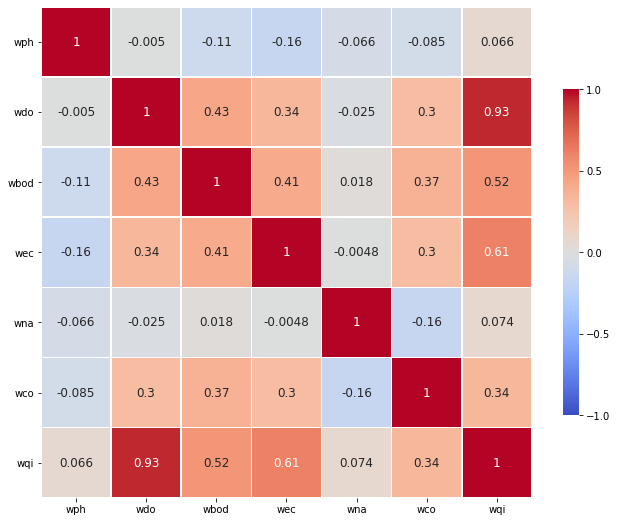

In [24]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [25]:
#calculation overall wqi for each year
ag=df1.groupby('station')['wqi'].mean()

In [26]:
ag.head()

station
17.0    70.403605
18.0    97.339342
20.0    95.399687
21.0    81.971003
42.0    98.800940
Name: wqi, dtype: float64

In [27]:
data=ag.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


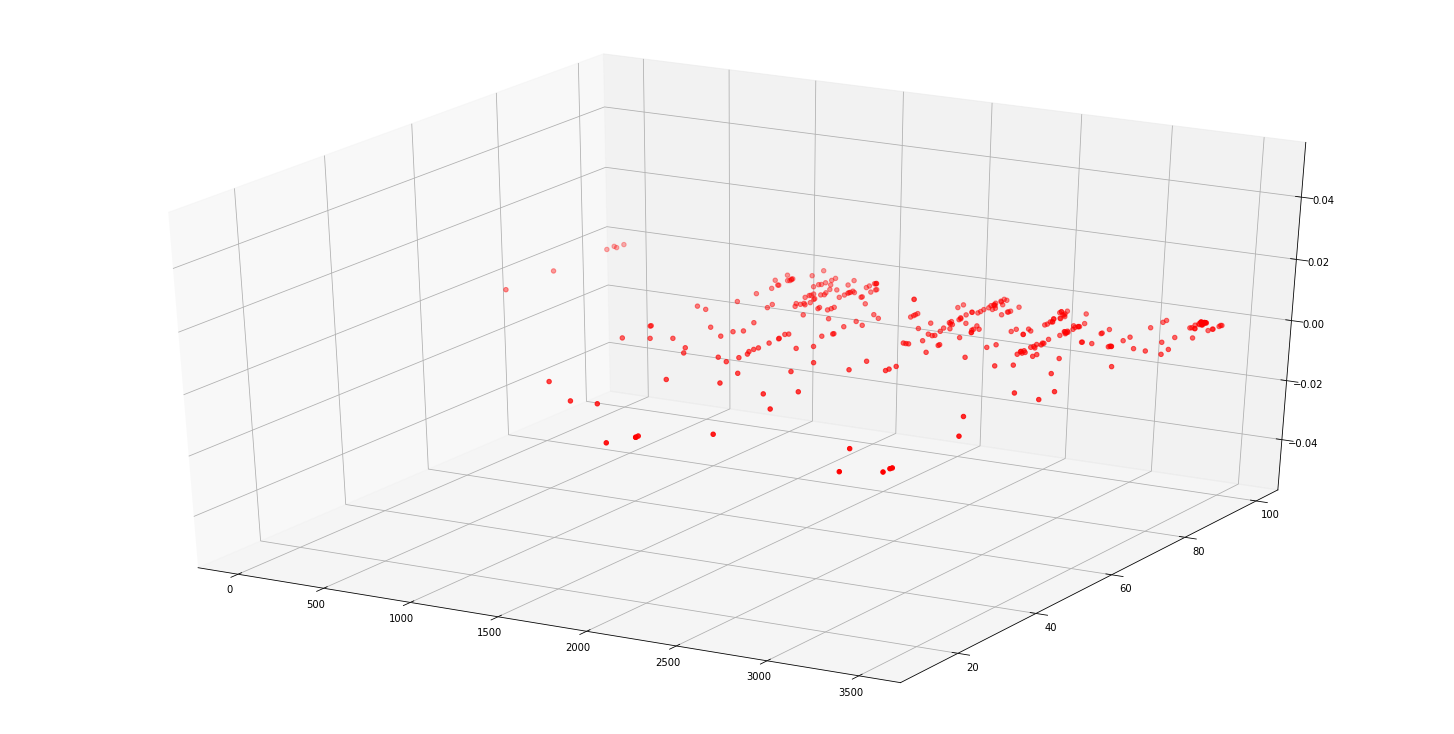

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


In [28]:
#visualizing the filttered data

station=data['station'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(station,AQI, color='red')
plt.show()
data

In [29]:
data = data[np.isfinite(data['wqi'])]
data.head()

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940


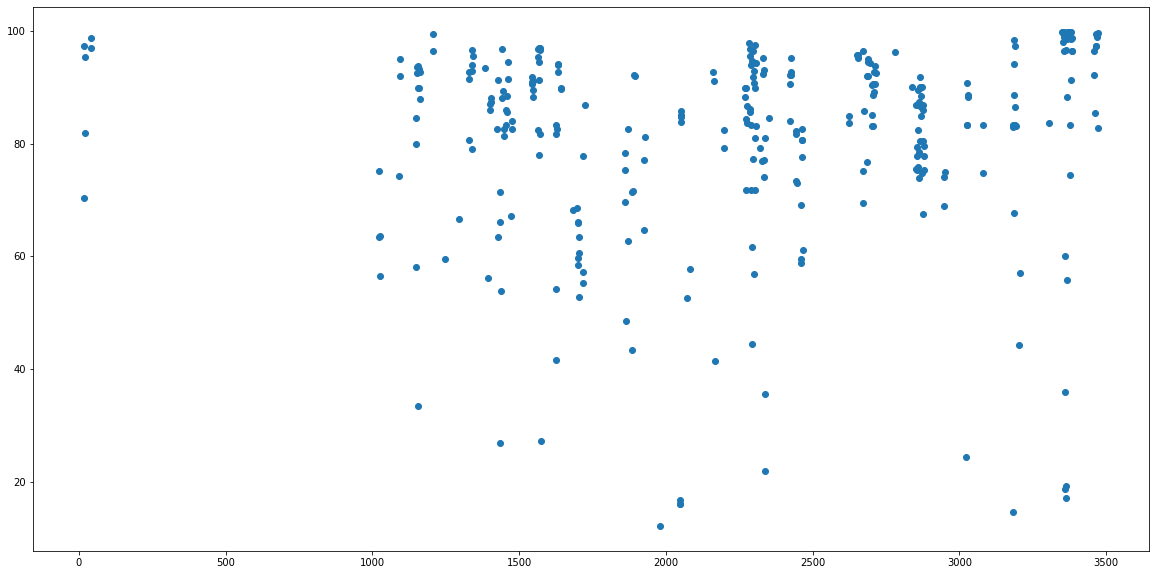

In [30]:
#scatter plot of data points
cols =['station']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

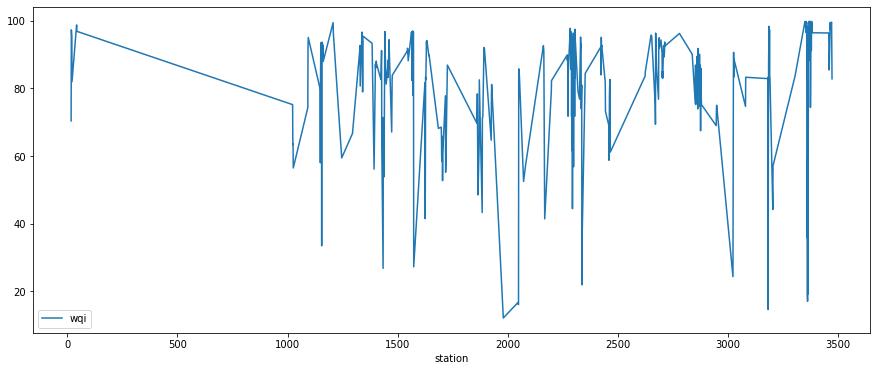

In [31]:
import matplotlib.pyplot as plt
data=data.set_index('station')
data.plot(figsize=(15,6))
plt.show()

In [32]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


In [33]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [34]:
cols =['station']
y = data['wqi']
x=data[cols]

In [35]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [36]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
a=reg.predict(x_test)
a

array([82.54011091, 80.66051511, 80.47684684, 79.41775039, 79.4452148 ,
       78.74315573, 79.72500852, 81.37802291, 79.21348381, 82.69974782,
       78.7345731 , 78.73285658, 78.51829084, 79.2254995 , 80.92314356,
       82.22598668, 82.23800236, 79.55335593, 80.77552234, 81.68184799,
       82.23456931, 82.5195126 , 79.44864786, 76.79318236, 78.64016418,
       79.20661771, 81.40033775, 79.67866232, 82.54354397, 80.72059351,
       82.70833045, 82.51607955, 81.63378526, 82.55555965, 79.41088429,
       80.77380581, 79.06242954, 79.67694579, 79.06071301, 79.56537161,
       79.29072748, 78.75688794, 81.66639926, 79.29587706, 79.58082035,
       82.52637871, 79.55507246, 78.63844765, 82.23113626, 82.05090105,
       79.65463096, 82.69803129, 81.67326536, 81.70416282, 81.37287333,
       79.6838119 , 80.71201088, 79.70955979, 81.65781663, 81.69214714,
       82.23285279, 80.00995181, 79.22378297, 81.70072977])

In [38]:
y_test

291    98.577586
134    88.288177
129    91.089901
68     89.596395
70     96.739812
         ...    
241    86.573276
267    98.405172
113    92.131226
46     26.767241
246    86.034483
Name: wqi, Length: 64, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:325.42


In [40]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [41]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.00000000e+00, -2.88728318e+00],
       [ 1.00000000e+00, -2.88600289e+00],
       [ 1.00000000e+00, -2.88344230e+00],
       [ 1.00000000e+00, -2.88216201e+00],
       [ 1.00000000e+00, -2.85527584e+00],
       [ 1.00000000e+00, -2.85399555e+00],
       [ 1.00000000e+00, -1.59930765e+00],
       [ 1.00000000e+00, -1.59802736e+00],
       [ 1.00000000e+00, -1.59674707e+00],
       [ 1.00000000e+00, -1.59546677e+00],
       [ 1.00000000e+00, -1.51096738e+00],
       [ 1.00000000e+00, -1.50968709e+00],
       [ 1.00000000e+00, -1.50840680e+00],
       [ 1.00000000e+00, -1.43927093e+00],
       [ 1.00000000e+00, -1.43799064e+00],
       [ 1.00000000e+00, -1.43671035e+00],
       [ 1.00000000e+00, -1.43543005e+00],
       [ 1.00000000e+00, -1.43414976e+00],
       [ 1.00000000e+00, -1.43158917e+00],
       [ 1.00000000e+00, -1.43030888e+00],
       [ 1.00000000e+00, -1.42902858e+00],
       [ 1.00000000e+00, -1.42518770e+00],
       [ 1.00000000e+00, -1.42390741e+00],
       [ 1.

In [42]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 80.85, 1.59


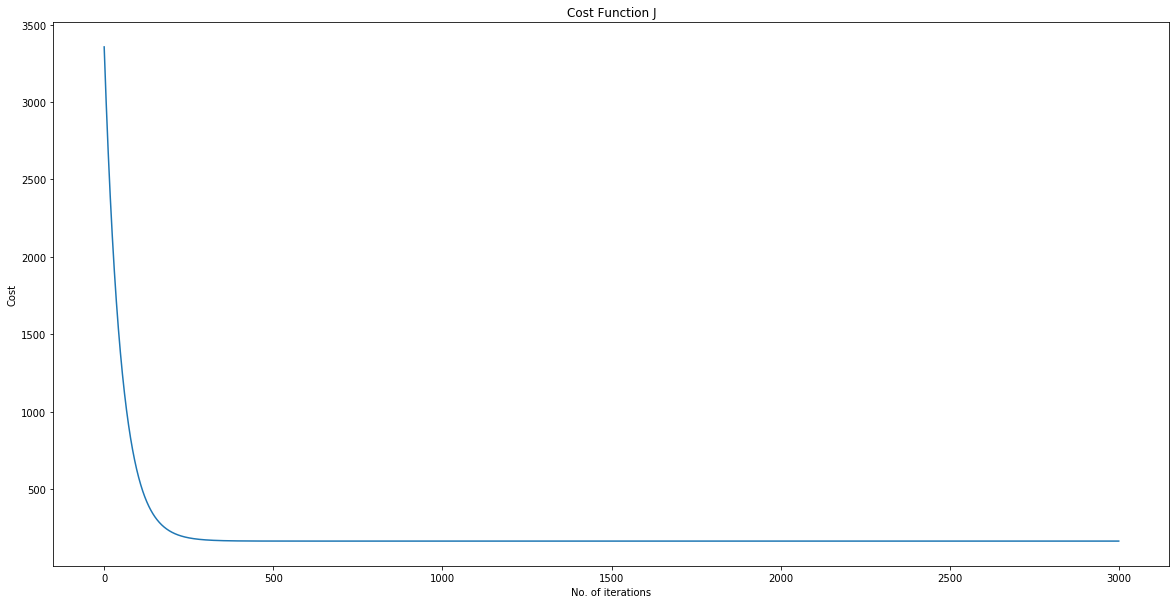

In [43]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [44]:
import numpy as np
newB=[80.85, 1.59]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt.tail()

,station,wqi,Actual,Predicted
314,3465.0,99.540230,99.540230,83.278200
315,3466.0,97.385057,97.385057,83.280236
316,3468.0,98.965517,98.965517,83.284307
317,3471.0,99.597701,99.597701,83.290414
318,3473.0,82.859195,82.859195,83.294485


In [45]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

18.149956081970927


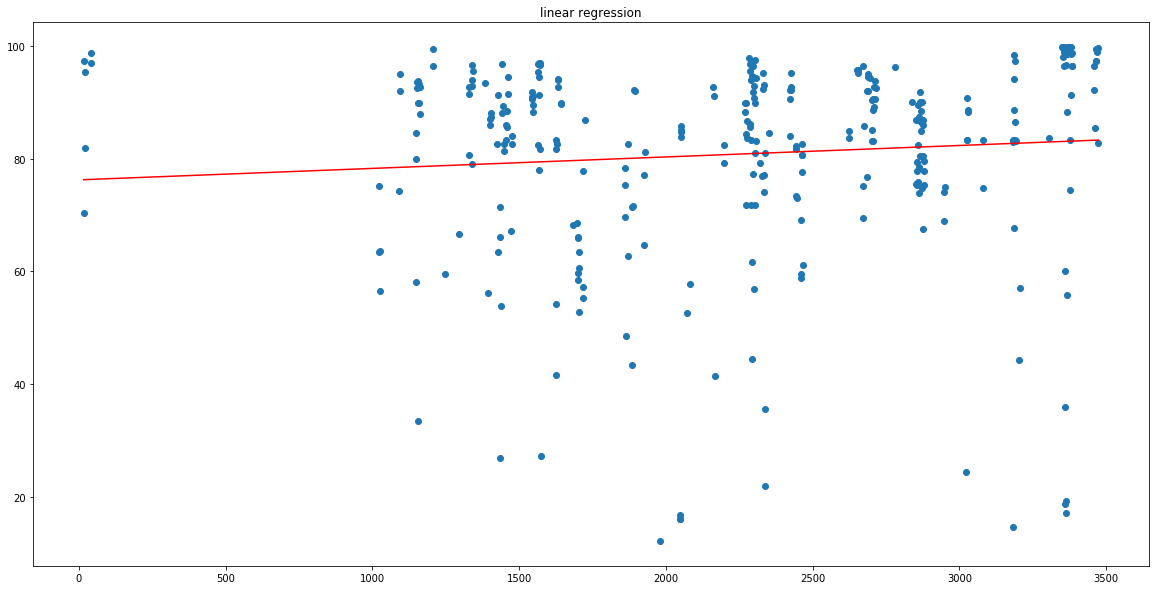

In [46]:
x_axis=dt.station
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [47]:
df1['Excellent']=df1.wqi.apply(lambda x: (1 if (100>=x>=80)  
                                              else 0))
df1['Needs attention']=df1.wqi.apply(lambda x: (1 if (79>=x>=50)  
                                              else 0))
df1['Critical']=df1.wqi.apply(lambda x: (1 if (50>=x>=0)  
                                              else 0))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wph,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,40,100,0,100,100,0,90.732759,1,0,0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,100,80,100,60,100,40,80.086207,1,0,0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,80,100,100,60,100,40,91.293103,1,0,0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,80,100,100,40,84.181034,1,0,0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,100,80,100,80,100,40,83.318966,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,100,0,100,60,83.491379,1,0,0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,0,100,100,0,100,60,74.870690,0,1,0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,0,100,100,80,0,40,81.163793,1,0,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,40,100,100,80,0,40,84.612069,1,0,0


In [48]:
df1['Y']=df1.wqi.apply(lambda x: ('Excellent' if (100>=x>=80) 
                                  else('Needs improvement' if (79>=x>=50)
                                              else 'Critical')))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,100,0,100,100,0,90.732759,1,0,0,Excellent
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,80,100,60,100,40,80.086207,1,0,0,Excellent
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,100,60,100,40,91.293103,1,0,0,Excellent
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,100,100,40,84.181034,1,0,0,Excellent
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [49]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [67]:
X = df1[['do','co','bod','tc','ph']]
Y = df1[['Excellent','Needs attention','Critical']]
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.25, random_state=2) 

In [68]:
model = Sequential()
model.add(Dense(20, input_dim = 5 , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 15, batch_size = 1)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/15
1488/1488 [==============================] - 2s 1ms/step - loss: 1522.3473 - accuracy: 0.4812
Epoch 2/15
1488/1488 [==============================] - 2s 1ms/step - loss: 2867.4874 - accuracy: 0.5491
Epoch 3/15
1488/1488 [==============================] - 2s 1ms/step - loss: 4912.8144 - accuracy: 0.4140
Epoch 4/15
1488/1488 [==============================] - 2s 1ms/step - loss: 4165.3504 - accuracy: 0.5000
Epoch 5/15
1488/1488 [==============================] - 2s 1ms/step - loss: 2324.4845 - accuracy: 0.5423
Epoch 6/15
1488/1488 [==============================] - 2s 1ms/step - loss: 510.5334 - accuracy: 0.5773
Epoch 7/15
1488/1488 [==============================] - 2s 1ms/step - loss: 3506.5956 - accuracy: 0.6270
Epoch 8/15
1488/1488 [==============================] - 2s 1ms/step - loss: 2565.8714 - accuracy: 0.5591
Epoch 9/15
1488/1488 [==============================] - 2s 1ms/step - loss: 3298.8896 - accuracy: 0.5746
Epoch 10/15
1488/1488 [==============================] -

In [69]:
y_pred = model.predict_classes(test_x)
y_pred

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,

In [70]:
test_y

,Excellent,Needs attention,Critical
998,0,1,0
1976,1,0,0
847,1,0,0
233,0,0,1
506,1,0,0
...,...,...,...
41,1,0,0
1369,0,0,1
1802,0,1,0
1569,1,0,0
